# Assignment 3. Sensor fusion 2022/23. Vsevolod Hulchuk, HYVBV0.

In [9]:
import numpy as np
from collections import OrderedDict
import time
import subprocess
import os
import matplotlib.pyplot as plt

In [11]:
default_params = OrderedDict([
    ("noise", 5),
    ("overlap_init", 0.8),
    ("overlap_icp", 0.8),
    ("roll", 0.2),
    ("dx", 100)
])

params_short = {
    "noise": "n",
    "overlap_init": "O",
    "overlap_icp": "o",
    "roll": "r",
    "dx": "x"
}

In [12]:
def run_algo(parameters):
    results = dict()
    parameters_cmd = [ f"-{params_short[k]}{parameters[k]}" for k in default_params.keys()]
    command = ['./build/TrICP'] + parameters_cmd
    start = time.time()
    with open(os.devnull, 'w') as fp:
        process = subprocess.Popen(command, stdout=fp)
    stdout, stderr = process.communicate()
    end = time.time()
    execution_time = end - start
    output_file = os.path.join("output", "output.txt")
    with open(output_file) as f:
        output_str = f.read()
    rot_err, tr_err, avg_distance, n_iter = (float(i) for i in output_str.split("\n")[2].split(": ")[1].split(", "))
    results["time"] = execution_time
    results["n_iter"] = n_iter
    results["avg_distance"]  = avg_distance
    results["tr_error"] = tr_err
    results["rot_err"] = rot_err
    return results

## Depending on the added noise

In [13]:
cur_params = default_params.copy()
results_dict = dict()
for noise in range(0, 20, 2):
    cur_params["noise"] = noise
    results_dict[noise] = run_algo(cur_params)

In [14]:
def plot_results(results):
    first_key = list(results.keys())[0]
    metrics_names_list = list(results[first_key].keys())[1:]
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20, 5))
    plt.suptitle("Metrics depending on noise")
    for i in range(4):
        ax = axes[i]
        xs = list(results.keys())
        metric_name = metrics_names_list[i]
        # print(results)
        metrics_values = [res[metric_name] for res in results.values()]
        ax.plot(xs, metrics_values, label=metric_name)
        ax.set_ylabel("value")
        ax.set_xlabel("noise")
        ax.set_title(metric_name)
        ax.legend()
    plt.plot()

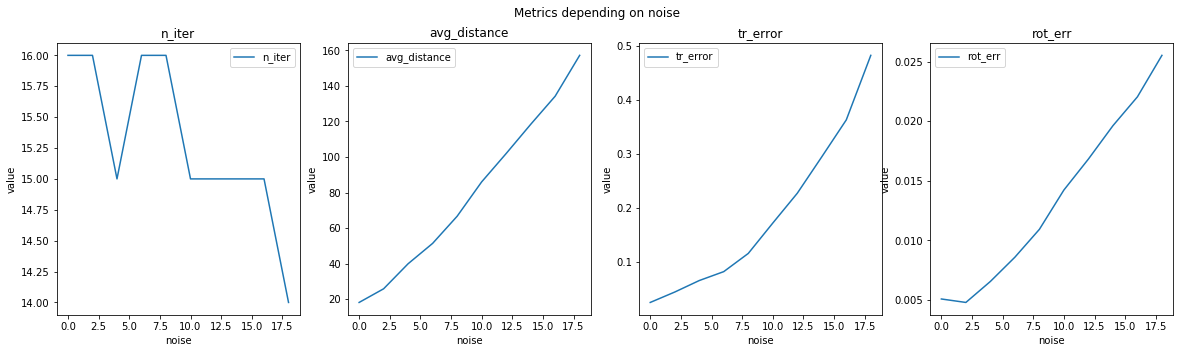

In [15]:
plot_results(results_dict)

## Now, we'd fix noise to 5. And see how TrICP or ICP perform depending on translation error

In [74]:
results_dict_icp = dict()
results_dict_tr = dict()
for dx in range(0, 1000, 50):
    cur_params["dx"] = dx
    cur_params["overlap_icp"] = 1.0
    results_dict_icp[dx] = run_algo(cur_params)
    cur_params["overlap_icp"] = 0.8
    results_dict_tr[dx] = run_algo(cur_params)

[]

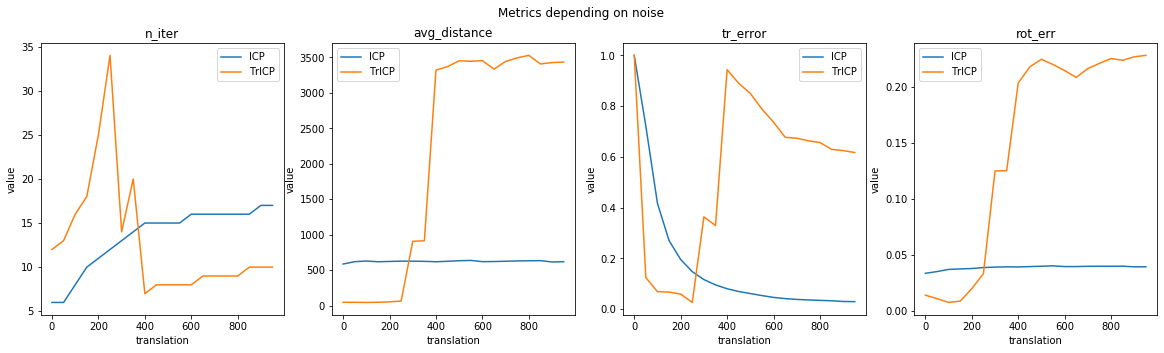

In [75]:
first_key = list(results_dict_icp.keys())[0]
metrics_names_list = list(results_dict_icp[first_key].keys())[1:]
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20, 5))
plt.suptitle("Metrics depending on noise")
for i in range(4):
    ax = axes[i]
    xs1 = list(results_dict_icp.keys())
    xs2 = list(results_dict_tr.keys())

    metric_name = metrics_names_list[i]
    metrics_values1 = [res[metric_name] for res in results_dict_icp.values()]
    metrics_values2 = [res[metric_name] for res in results_dict_tr.values()]
    ax.plot(xs1, metrics_values1, label="ICP")
    ax.plot(xs2, metrics_values2, label="TrICP")
    ax.set_ylabel("value")
    ax.set_xlabel("translation")
    ax.set_title(metric_name)
    ax.legend()
plt.plot()

## Same for rotation

In [82]:
cur_params = default_params.copy()
results_dict_icp_roll = dict()
results_dict_tr_roll = dict()
for roll in np.arange(0, 0.5, 0.1):
    cur_params["roll"] = roll
    cur_params["overlap_icp"] = 1.0
    results_dict_icp_roll[roll] = run_algo(cur_params)
    cur_params["overlap_icp"] = 0.8
    results_dict_tr_roll[roll] = run_algo(cur_params)

[]

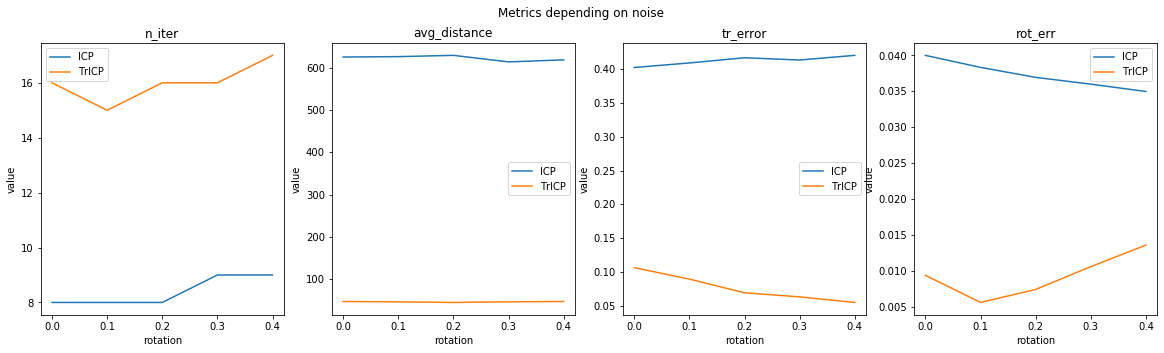

In [85]:
first_key = list(results_dict_icp_roll.keys())[0]
metrics_names_list = list(results_dict_icp_roll[first_key].keys())[1:]
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20, 5))
plt.suptitle("Metrics depending on noise")
for i in range(4):
    ax = axes[i]
    xs1 = list(results_dict_icp_roll.keys())
    xs2 = list(results_dict_tr_roll.keys())

    metric_name = metrics_names_list[i]
    metrics_values1 = [res[metric_name] for res in results_dict_icp_roll.values()]
    metrics_values2 = [res[metric_name] for res in results_dict_tr_roll.values()]
    ax.plot(xs1, metrics_values1, label="ICP")
    ax.plot(xs2, metrics_values2, label="TrICP")
    ax.set_ylabel("value")
    ax.set_xlabel("rotation")
    ax.set_title(metric_name)
    ax.legend()
plt.plot()

## And now let's nee how different algorithms perform depending on different overlaps

## In case TrICP does not know thew overlap ratio:

(Otherwice it would just always perform as better as it is for 0.8 here)

In [19]:
cur_params = default_params.copy()
results_dict_icp_overlap = dict()
results_dict_tr_overlap = dict()
for overlap in np.arange(0.5, 1.001, 0.1):
    cur_params["overlap_init"] = overlap
    cur_params["overlap_icp"] = 1.0
    results_dict_icp_overlap[overlap] = run_algo(cur_params)
    cur_params["overlap_icp"] = 0.8
    results_dict_tr_overlap[overlap] = run_algo(cur_params)

[]

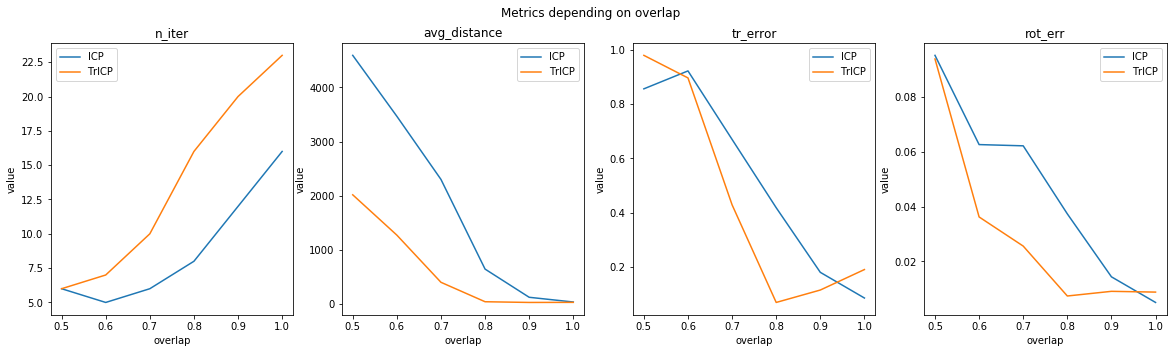

In [21]:
first_key = list(results_dict_icp_overlap.keys())[0]
metrics_names_list = list(results_dict_icp_overlap[first_key].keys())[1:]
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(20, 5))
plt.suptitle("Metrics depending on overlap")
for i in range(4):
    ax = axes[i]
    xs1 = list(results_dict_icp_overlap.keys())
    xs2 = list(results_dict_tr_overlap.keys())
    metric_name = metrics_names_list[i]
    metrics_values1 = [res[metric_name] for res in results_dict_icp_overlap.values()]
    metrics_values2 = [res[metric_name] for res in results_dict_tr_overlap.values()]
    ax.plot(xs1, metrics_values1, label="ICP")
    ax.plot(xs2, metrics_values2, label="TrICP")
    ax.set_ylabel("value")
    ax.set_xlabel("overlap")
    ax.set_title(metric_name)
    ax.legend()
plt.plot()

We can see that regular ICP performs better only for full overlap case

## Time is proportional to n_iterations, but you can see it here cause execution time was a requirement

[]

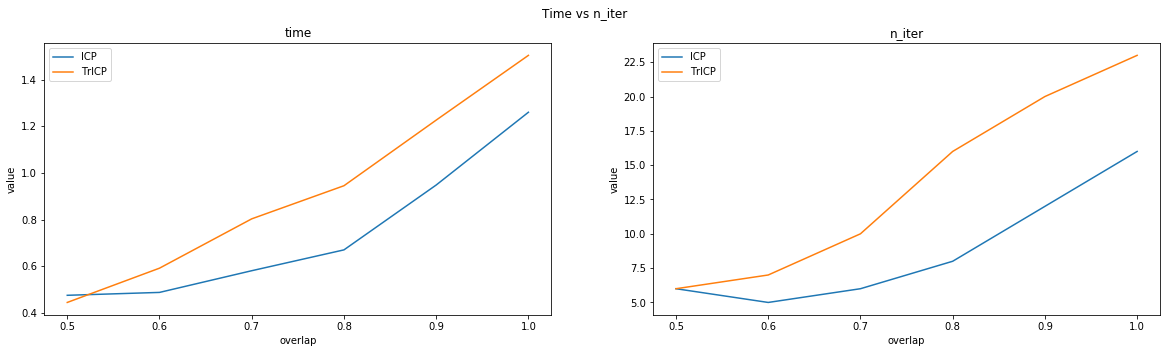

In [22]:
first_key = list(results_dict_icp_overlap.keys())[0]
metrics_names_list = ["time", "n_iter"]
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 5))
plt.suptitle("Time vs n_iter")
for i in range(len(metrics_names_list)):
    ax = axes[i]
    xs1 = list(results_dict_icp_overlap.keys())
    xs2 = list(results_dict_tr_overlap.keys())

    metric_name = metrics_names_list[i]
    metrics_values1 = [res[metric_name] for res in results_dict_icp_overlap.values()]
    metrics_values2 = [res[metric_name] for res in results_dict_tr_overlap.values()]
    ax.plot(xs1, metrics_values1, label="ICP")
    ax.plot(xs2, metrics_values2, label="TrICP")
    ax.set_ylabel("value")
    ax.set_xlabel("overlap")
    ax.set_title(metric_name)
    ax.legend()
plt.plot()

## And some visualizations of the alligned pointclouds:
### Initial misalligned:

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://server.seva-hul.com/media/IFRoS/SensFusion/init.jpg")

### Alligned with naive ICP:

In [2]:
Image(url= "http://server.seva-hul.com/media/IFRoS/SensFusion/naive.jpg")

### Alligned with trimmed ICP:

In [6]:
Image(url= "http://server.seva-hul.com/media/IFRoS/SensFusion/trimmed.jpg")